# Exploratory Data Analysis (I never add the graphs lol)

In [ ]:
!pip install SMOTE
!pip install imblearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sb
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from utils_v2 import *
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 199 kB 32.4 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
df = load_processed_csv(train = True)
df.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature63,feature64,feature65,feature66,feature67,feature68,feature69,feature70,feature71,label
0,0.302245,0.0,0.2,0.0,1.0,1.0,0.0,0.0,0.0,0.125,...,0,0,2,1,0,0,1,0,0,3
1,-0.224298,0.0,0.3,0.0,1.0,1.0,1.0,0.0,0.0,0.125,...,0,0,1,1,4,5,0,0,0,3
2,0.206510,0.0,0.7,0.0,1.0,1.0,0.0,0.0,0.0,0.000,...,0,0,1,1,4,0,0,0,0,3
3,0.206510,0.0,0.4,0.0,1.0,1.0,1.0,0.0,0.0,0.250,...,0,0,1,1,0,0,0,0,0,3
4,0.206510,0.0,0.4,0.0,1.0,1.0,1.0,0.0,0.0,0.250,...,0,0,1,1,0,0,0,0,0,3


# Feature Engineering and Data Processing

# Modelling

In [ ]:
X = df.iloc[:, :-1]
Y = df["label"]
print("original distribution:",Counter(Y))

original distribution: Counter({3: 5996, 1: 1597, 2: 1209, 0: 755})


In [ ]:
#upsamlping 
smo = SMOTE(random_state=42)
X_smo, Y_smo = smo.fit_resample(X, Y)
print("smote distribution:",Counter(Y_smo))
X,Y=X_smo, Y_smo#using smote dataset

smote distribution: Counter({3: 5996, 1: 5996, 2: 5996, 0: 5996})


In [ ]:
model = RandomForestClassifier(class_weight = "balanced", random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X, Y,shuffle = "True", test_size =0.20, stratify = Y)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

macro_F1_metric=[]
score = accuracy_score(y_test, y_test_pred)
print("Accuracy score is " + str(score))
report=classification_report(y_test, y_test_pred)
macro_F1_metric.append(eval(report.split("\n")[8].split()[4]))
with open('RF_data/RF_model_{}.pkl'.format(macro_F1_metric[-1]), 'wb') as f:
    pickle.dump(model, f)#store as pickle
print('model saved to RF_data/RF_model_{}.pkl'.format(macro_F1_metric[-1]))
print(report)

Accuracy score is 0.9768605378361476
model saved to RF_data/RF_model_0.98.pkl
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1200
           1       0.98      0.96      0.97      1199
           2       0.98      0.97      0.98      1199
           3       0.96      0.99      0.97      1199

    accuracy                           0.98      4797
   macro avg       0.98      0.98      0.98      4797
weighted avg       0.98      0.98      0.98      4797



In [ ]:
with open(('RF_data/RF_model_0.89.pkl'), 'rb+') as f:
    model = pickle.load(f)#load model
generate_sumbit_csv(model,'RF')

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X d

True

Feature importances

Accuracy score is 0.9768605378361476


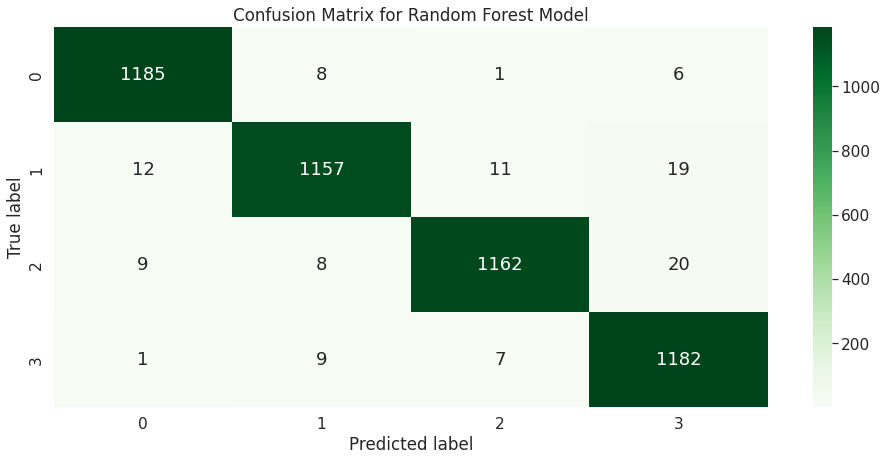

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1200
           1       0.98      0.96      0.97      1199
           2       0.98      0.97      0.98      1199
           3       0.96      0.99      0.97      1199

    accuracy                           0.98      4797
   macro avg       0.98      0.98      0.98      4797
weighted avg       0.98      0.98      0.98      4797

Accuracy of class 0 is  0.9875
Accuracy of class 1 is  0.9649708090075062
Accuracy of class 2 is  0.969140950792327
Accuracy of class 3 is  0.9858215179316097


In [ ]:
score = accuracy_score(y_test, y_test_pred)
print("Accuracy score is " + str(score))

# Build the plot
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(16,7))
sb.set(font_scale=1.4)
sb.heatmap(cm, annot=True, annot_kws={'size':18},cmap=plt.cm.Greens, fmt=".0f")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

print(classification_report(y_test, y_test_pred))

c0 = cm[0][0]/(cm[0][0]+cm[0][1]+cm[0][2]+cm[0][3])
c1 = cm[1][1]/(cm[1][0]+cm[1][1]+cm[1][2]+cm[1][3])
c2 = cm[2][2]/(cm[2][0]+cm[2][1]+cm[2][2]+cm[2][3])
c3 = cm[3][3]/(cm[3][0]+cm[3][1]+cm[3][2]+cm[3][3])


print("Accuracy of class 0 is ", c0)
print("Accuracy of class 1 is ", c1)
print("Accuracy of class 2 is ", c2)
print("Accuracy of class 3 is ", c3)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f92fbbcf-fa92-4caa-ad57-5cd0b8c2766a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>